In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [37]:
# Reading train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [39]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 978.1+ KB


In [41]:
train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [42]:
# casual and registered columns are not present in test data so they are not useful
train_data.drop(['casual','registered'],axis=1,inplace=True)
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [43]:
# Conversion of datetime type from object to datetime
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
test_data['datetime'] = pd.to_datetime(test_data['datetime'])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.5 KB


In [44]:
#Splitting datetime to day, month, year and hour; Add these as new features to the data set
train_data['year'] = train_data['datetime'].dt.year
train_data['month'] = train_data['datetime'].dt.month
train_data['hour'] = train_data['datetime'].dt.hour
train_data['DayOfWeek'] = train_data['datetime'].dt.dayofweek

test_data['year'] = test_data['datetime'].dt.year
test_data['month'] = test_data['datetime'].dt.month
test_data['hour'] = test_data['datetime'].dt.hour
test_data['DayOfWeek'] = test_data['datetime'].dt.dayofweek

train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,hour,DayOfWeek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,4,5


In [45]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,DayOfWeek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,3


In [46]:
# Selection of features
X_select_train = train_data[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','month','hour','DayOfWeek']]
y_select_train = train_data['count']

X_test = test_data[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','month','hour','DayOfWeek']]

In [47]:
# Splitting of train_data in to training data and validating data
X_train, X_valid, y_train, y_valid = train_test_split(X_select_train, y_select_train, test_size = 0.3, random_state = 42)
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,DayOfWeek
613,1,0,1,1,9.02,9.090,32,39.0007,2011,2,17,1
4030,3,0,0,1,22.14,25.760,68,12.9980,2011,9,23,6
3582,3,0,1,1,26.24,28.790,83,0.0000,2011,8,4,4
10101,4,0,1,1,9.02,11.365,69,8.9981,2012,11,6,1
1430,2,0,1,3,13.12,14.395,81,30.0026,2011,4,11,1


In [48]:
X_valid.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,DayOfWeek
3133,3,0,1,1,33.62,40.150,59,0.0000,2011,7,11,1
5786,1,1,0,1,4.10,6.820,54,6.0032,2012,1,6,0
5224,4,0,0,1,9.84,11.365,48,12.9980,2011,12,18,6
8953,3,0,1,2,29.52,34.090,62,12.9980,2012,8,10,2
8054,2,0,1,1,25.42,31.060,53,16.9979,2012,6,23,4


In [49]:
# Calculating Root Mean Squared Logarthimic Error (RMSLE)
def RMSLE(prediction, original):
    print(prediction)
    prediction_processed = prediction.clip(0)
    rmsle = np.sqrt(np.mean(np.array(np.log(prediction_processed + 1) - np.log(original + 1))**2))
    return rmsle

[246.43047269  45.5838636  202.53710612 ... 209.96817657 309.84715855
 -98.30744781]
1.295883744222615


Text(0, 0.5, 'Predicted')

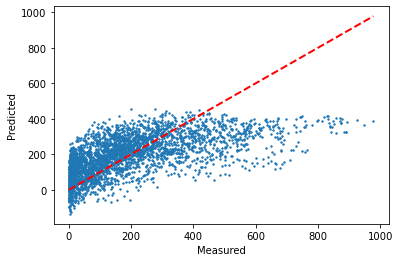

In [50]:
#Linear Regression Model
linearRegressor = LinearRegression()
linearRegressor.fit(X_train,y_train)
y_train_predicted = linearRegressor.predict(X_valid)
print(RMSLE(y_train_predicted, y_valid))

#Plotting between predicted vs original datasets
fig, ax = plt.subplots()
ax.scatter(y_valid, y_train_predicted, s=2)
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', color = 'r', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

[246.45938946  45.56899354 202.55649967 ... 209.94336928 309.83238448
 -98.28410167]
1.2958380301943226


Text(0, 0.5, 'Predicted')

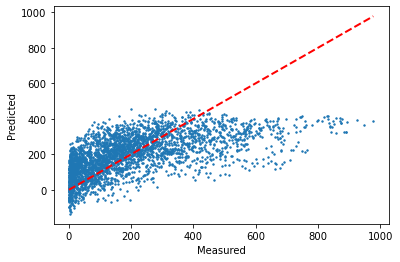

In [51]:
# Ridge Regression Model
RidgeRegressor = Ridge()
RidgeRegressor.fit(X_train,y_train)
y_train_predicted_Ridge = RidgeRegressor.predict(X_valid)
print(RMSLE(y_train_predicted_Ridge, y_valid))

#Plotting between predicted vs original datasets
fig, ax = plt.subplots()
ax.scatter(y_valid, y_train_predicted_Ridge, s=2)
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', color = 'r', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

[136.1341332   25.13445145 169.74090466 ... 246.70342075 161.77586621
   2.30832607]
0.344101948423397


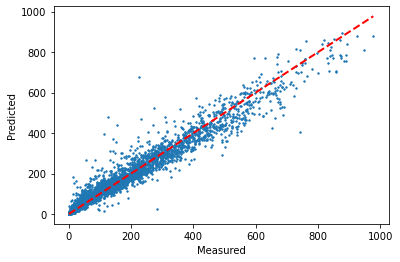

In [52]:
# Random Forest Regression Model
RFR = RandomForestRegressor(n_estimators = 500, min_samples_leaf = 5, random_state = 42)
RFR.fit(X_train,y_train)
y_train_predicted_RFR = RFR.predict(X_valid)
print(RMSLE(y_train_predicted_RFR, y_valid))

#Plotting between predicted vs original datasets
fig, ax = plt.subplots()
ax.scatter(y_valid, y_train_predicted_RFR, s=2)
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', color = 'r', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [53]:
# Linear Regression Model on test set
sample_submission = pd.read_csv('sampleSubmission.csv')
predicted_count_LR = linearRegressor.predict(X_test)
sample_submission['count'] = pd.Series(predicted_count_LR.clip(0))
sample_submission.to_csv('Output.csv', index = False)

In [54]:
# Random Forest Regression Model on test set
sample_submission1 = pd.read_csv('sampleSubmission.csv')
predicted_count_RFR = RFR.predict(X_test)
sample_submission1['count'] = pd.Series(predicted_count_RFR.clip(0))
sample_submission1.to_csv('OutputRFR.csv', index = False)